In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE


data = pd.read_csv('/content/drive/MyDrive/Class notebook/Assignment 1-Dataset.csv')

corr_matrix = data.corr()
corr_with_target = corr_matrix['Target']
abs_corr_with_target = np.abs(corr_with_target)
top_25_corr_features = abs_corr_with_target.nlargest(47).index[1:]
X = np.array(data[top_25_corr_features])
y = np.array(data.iloc[:, 92].values)

print(X)
print(y)

[[ 2.  0.  0. ...  0.  0.  0.]
 [ 0. 36. 36. ...  0.  0.  0.]
 [ 0. 36. 36. ...  0.  0.  0.]
 ...
 [ 0. 60. 60. ...  0.  0.  0.]
 [ 0. 60. 60. ...  0.  0.  0.]
 [ 0. 48. 48. ...  0.  0.  0.]]
[2 2 2 ... 2 2 2]


In [4]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)


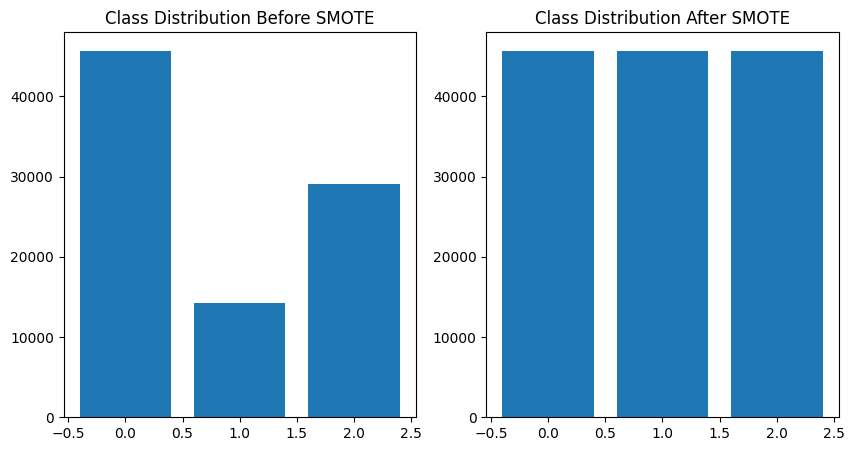

In [5]:
import matplotlib.pyplot as plt
from collections import Counter
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


counter_before = Counter(y_train)

counter_after = Counter(y_train_res)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data before SMOTE
ax[0].bar(counter_before.keys(), counter_before.values())
ax[0].set_title('Class Distribution Before SMOTE')

# Plot the data after SMOTE
ax[1].bar(counter_after.keys(), counter_after.values())
ax[1].set_title('Class Distribution After SMOTE')

# Show the plot
plt.show()


In [7]:
model_adagrad = Sequential([
    Dense(64, activation='relu', input_shape=(46,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model_adagrad.compile(optimizer=Adagrad(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_rmsprop = Sequential([
    Dense(64, activation='relu', input_shape=(46,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model_rmsprop.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history_adagrad = model_adagrad.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

test_loss_adagrad, test_accuracy_adagrad = model_adagrad.evaluate(X_test, y_test)
test_loss_rmsprop, test_accuracy_rmsprop = model_adagrad.evaluate(X_test, y_test)

print("Test Loss (Adagrad):", test_loss_adagrad)
print("Test Accuracy (Adagrad):", test_accuracy_adagrad)
print("Test Loss (RMSprop):", test_loss_rmsprop)
print("Test Accuracy (RMSprop):", test_accuracy_rmsprop)



Epoch 1/20
696/696 [==============================] - 5s 5ms/step - loss: 1.0835 - accuracy: 0.4111 - val_loss: 1.0134 - val_accuracy: 0.5233
Epoch 2/20
696/696 [==============================] - 2s 3ms/step - loss: 0.9761 - accuracy: 0.5451 - val_loss: 0.9466 - val_accuracy: 0.5555
Epoch 3/20
696/696 [==============================] - 2s 3ms/step - loss: 0.9233 - accuracy: 0.5618 - val_loss: 0.9065 - val_accuracy: 0.5630
Epoch 4/20
696/696 [==============================] - 4s 6ms/step - loss: 0.8912 - accuracy: 0.5702 - val_loss: 0.8813 - val_accuracy: 0.5689
Epoch 5/20
696/696 [==============================] - 4s 5ms/step - loss: 0.8697 - accuracy: 0.5764 - val_loss: 0.8637 - val_accuracy: 0.5751
Epoch 6/20
696/696 [==============================] - 2s 3ms/step - loss: 0.8539 - accuracy: 0.5826 - val_loss: 0.8503 - val_accuracy: 0.5820
Epoch 7/20
696/696 [==============================] - 2s 3ms/step - loss: 0.8414 - accuracy: 0.5872 - val_loss: 0.8394 - val_accuracy: 0.5865
Epoch 

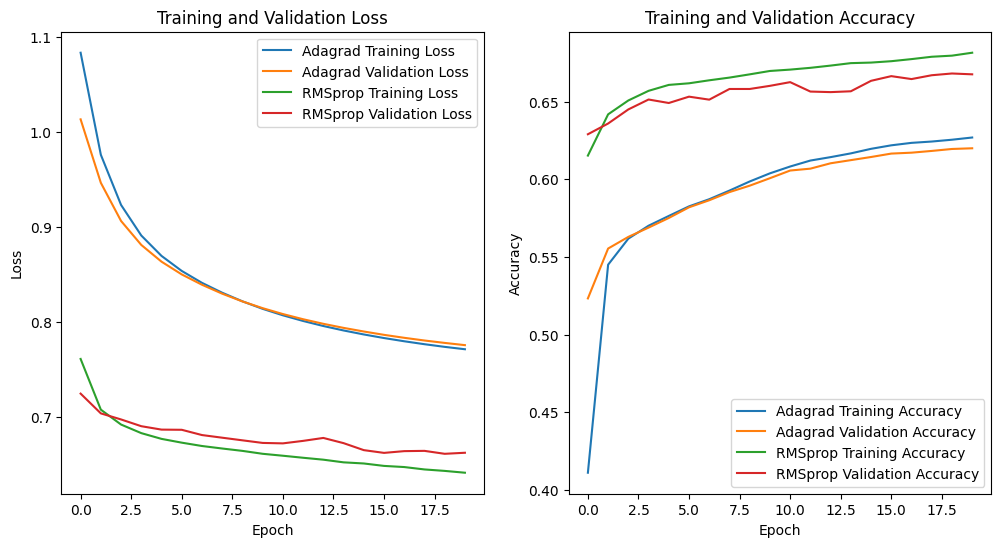

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_adagrad.history['loss'], label='Adagrad Training Loss')
plt.plot(history_adagrad.history['val_loss'], label='Adagrad Validation Loss')
plt.plot(history_rmsprop.history['loss'], label='RMSprop Training Loss')
plt.plot(history_rmsprop.history['val_loss'], label='RMSprop Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_adagrad.history['accuracy'], label='Adagrad Training Accuracy')
plt.plot(history_adagrad.history['val_accuracy'], label='Adagrad Validation Accuracy')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop Training Accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
model_adagrad = Sequential([
    Dense(64, activation='relu', input_shape=(46,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model_adagrad.compile(optimizer=Adagrad(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_rmsprop = Sequential([
    Dense(64, activation='relu', input_shape=(46,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model_rmsprop.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history_adagradsmote = model_adagrad.fit(X_train_res, y_train_res, epochs=10, batch_size=128, validation_data=(X_test, y_test))
history_rmspropsmote = model_rmsprop.fit(X_train_res, y_train_res, epochs=10, batch_size=128, validation_data=(X_test, y_test))

test_loss_adagrad, test_accuracy_adagrad = model_adagrad.evaluate(X_test, y_test)
test_loss_rmsprop, test_accuracy_rmsprop = model_adagrad.evaluate(X_test, y_test)

print("Test Loss (Adagrad):", test_loss_adagrad)
print("Test Accuracy (Adagrad):", test_accuracy_adagrad)
print("Test Loss (RMSprop):", test_loss_rmsprop)
print("Test Accuracy (RMSprop):", test_accuracy_rmsprop)



Epoch 1/10
1072/1072 [==============================] - 6s 4ms/step - loss: 1.0265 - accuracy: 0.5158 - val_loss: 1.0659 - val_accuracy: 0.4998
Epoch 2/10
1072/1072 [==============================] - 4s 4ms/step - loss: 0.9769 - accuracy: 0.5521 - val_loss: 1.0460 - val_accuracy: 0.5259
Epoch 3/10
1072/1072 [==============================] - 3s 3ms/step - loss: 0.9565 - accuracy: 0.5635 - val_loss: 1.0318 - val_accuracy: 0.5378
Epoch 4/10
1072/1072 [==============================] - 3s 3ms/step - loss: 0.9422 - accuracy: 0.5687 - val_loss: 1.0186 - val_accuracy: 0.5449
Epoch 5/10
1072/1072 [==============================] - 4s 4ms/step - loss: 0.9309 - accuracy: 0.5714 - val_loss: 1.0081 - val_accuracy: 0.5507
Epoch 6/10
1072/1072 [==============================] - 3s 3ms/step - loss: 0.9216 - accuracy: 0.5747 - val_loss: 0.9985 - val_accuracy: 0.5543
Epoch 7/10
1072/1072 [==============================] - 3s 3ms/step - loss: 0.9133 - accuracy: 0.5779 - val_loss: 0.9906 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_adagradsmote.history['loss'], label='Adagrad Training Loss')
plt.plot(history_adagradsmote.history['val_loss'], label='Adagrad Validation Loss')
plt.plot(history_rmspropsmote.history['loss'], label='RMSprop Training Loss')
plt.plot(history_rmspropsmote.history['val_loss'], label='RMSprop Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_adagradsmote.history['accuracy'], label='Adagrad Training Accuracy')
plt.plot(history_adagradsmote.history['val_accuracy'], label='Adagrad Validation Accuracy')
plt.plot(history_rmspropsmote.history['accuracy'], label='RMSprop Training Accuracy')
plt.plot(history_rmspropsmote.history['val_accuracy'], label='RMSprop Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()
